In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

%matplotlib inline
plt.style.use('tableau-colorblind10')

### plot de SPI anual para cada zona creada

Debemos conocer las zonas creadas y como nombrarlas

In [2]:
df_1 = pd.read_csv("./yearly-spi-by-zone.txt", sep="\t", header=None, names=["zone", "year", "SPI"])
df_1 = df_1.sort_values(by=["zone", "year"])
df_1.head()

,zone,year,SPI
882,0,1995,-1.225874
880,0,1998,0.528520
881,0,1999,-1.392804
875,0,2001,-0.978618
874,0,2002,-0.597189


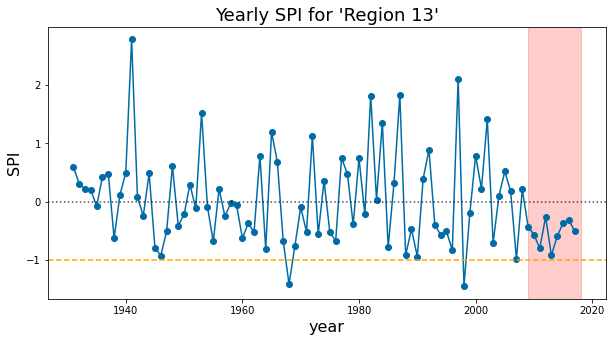

In [3]:
zone = 13
zone_name = "Region 13"
y = np.array(df_1[df_1["zone"] == zone]["SPI"], dtype=float)
x = np.array(df_1[df_1["zone"] == zone]["year"], dtype=int)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, '-o')
ax.axvspan(2009, 2018, color="red", alpha=0.2)
ax.axhline(-1.0, color="orange", linestyle="--")
ax.axhline(0, color="black", linestyle=":", alpha=0.7)
ax.set_xlabel("year", fontsize=16)
ax.set_ylabel("SPI", fontsize=16)
ax.set_title("Yearly SPI for '{}'".format(zone_name), fontsize=18)
ticks = np.arange(int(x[0] / 10)  * 10, 2020, 15)
plt.savefig("yearly_spi.png", dpi=300)

## Plot de histograma y distribucion normal 
la distribucion normal es utilizada para obtener los indices de precipitacion

In [4]:
# archivo yearly-data-with-zone.txt es generado por compute_statistics.py
df_2 = pd.read_csv("./yearly-data-with-zone.txt", sep="\t", header=None, names=["code", "year", "precip", "zone"])
df_2 = df_2.sort_values(by=["zone", "year"])
df_2.head()

,code,year,precip,zone
18605,11700001,1995,255.4,0
18606,11700001,1998,387.7,0
18653,12125001,1998,3475.7,0
18607,11700001,1999,95.9,0
18608,11700001,2001,271.6,0


In [5]:
# archivo mean-zone-yearly-data.txt es generado por compute_statistics.py
df_3 = pd.read_csv("./mean-zone-yearly-data.txt", sep="\t", header=None, names=["zone", "mean", "std"])
df_3.head()

,zone,mean,std
0,11,1676.956836,1174.208038
1,10,2002.114568,586.730285
2,13,393.766455,216.298357
3,12,472.025241,263.404236
4,15,139.733594,164.816481


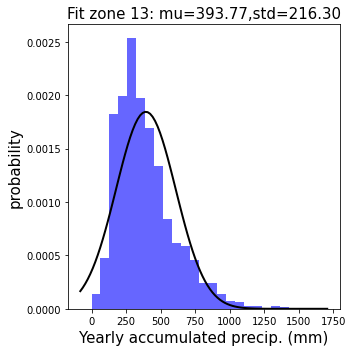

In [6]:

zone = 13
precip_yearly = np.array(df_2[df_2["zone"] == zone]["precip"], dtype=float)

mu = float(df_3[df_3["zone"] == zone]["mean"])
std = float(df_3[df_3["zone"] == zone]["std"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(precip_yearly, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit zone %d: mu=%.2f,std=%.2f" % (zone, mu, std)
plt.xlabel("Yearly accumulated precip. (mm)", fontsize=15)
plt.ylabel("probability", fontsize=15)
plt.title(title, fontsize=15)
fig.tight_layout()
plt.savefig("fit_distribution.png", dpi=300)

### Plot de localizacion geografica y lluvia anual promedio versus latitud

In [7]:
df_4 = pd.read_csv("./mean-yearly-precip-lat-lon-zone.txt", sep="\t", header=None, 
                   names=["code", "annual_mean", "lat", "lon", "zone"])
df_4.head()

,code,annual_mean,lat,lon,zone
0,3404002,47.797727,-27.8364,-69.7550,3
1,220002,6.277083,-22.4989,-68.9072,2
2,10111002,2274.300000,-39.7731,-72.4581,9
3,12878002,330.600000,-54.8817,-68.6825,12
4,3430003,107.050000,-28.0003,-69.9747,3


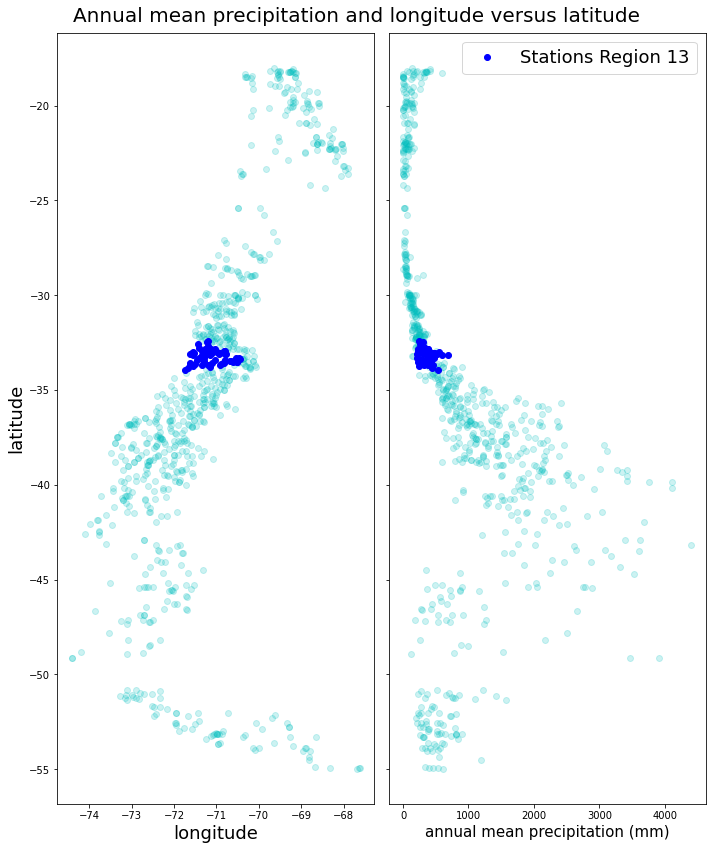

In [8]:

zones = np.unique(np.array(df_4["zone"], dtype=int))

fig, ax = plt.subplots(1, 2, figsize=(10, 12), sharey=True)

for zone in zones:
    annual_mean = np.array(df_4[df_4["zone"] == zone]["annual_mean"], dtype=float)
    lat = np.array(df_4[df_4["zone"] == zone]["lat"], dtype=float)
    lon = np.array(df_4[df_4["zone"] == zone]["lon"], dtype=float)
    if zone == 13:
        ax[1].plot(annual_mean, lat, "bo", label="Stations Region 13".format(zone))
        ax[0].plot(lon, lat, "bo", label="Zone {}".format(zone))
    else:
        ax[1].plot(annual_mean, lat, "co", alpha=0.2)
        ax[0].plot(lon, lat, "co", alpha=0.2)
    
    
ax[1].set_xlabel("annual mean precipitation (mm)", fontsize=15)
ax[0].set_ylabel("latitude", fontsize=18)

ax[0].set_xlabel("longitude", fontsize=18)

plt.legend(fontsize=18)
fig.suptitle("Annual mean precipitation and longitude versus latitude", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig("annual_mean_lat_lon.png", dpi=300)
# ax[1].set_xlim([-76, -66])

# plots para division por zona natural

In [9]:
df_21 = pd.read_csv("./yearly-spi-by-natural-zone.txt", sep="\t", header=None, names=["zone", "year", "SPI"])
df_21 = df_21.sort_values(by=["zone", "year"])
df_21.head()

,zone,year,SPI
36,1,1931,-0.338341
35,1,1932,-0.385271
34,1,1933,1.055632
33,1,1934,0.177886
32,1,1935,0.719169


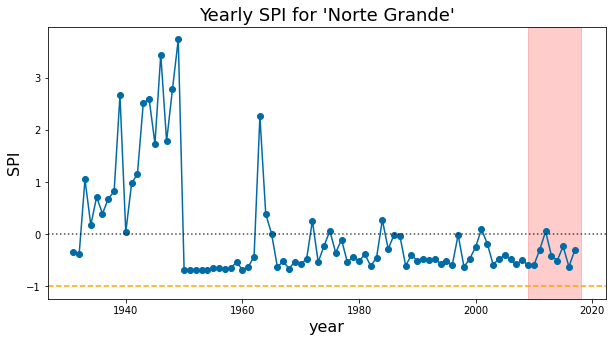

In [10]:
zone = 1
zone_name = "Norte Grande"
y = np.array(df_21[df_21["zone"] == zone]["SPI"], dtype=float)
x = np.array(df_21[df_21["zone"] == zone]["year"], dtype=int)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, '-o')
ax.axvspan(2009, 2018, color="red", alpha=0.2)
ax.axhline(-1.0, color="orange", linestyle="--")
ax.axhline(0, color="black", linestyle=":", alpha=0.7)
ax.set_xlabel("year", fontsize=16)
ax.set_ylabel("SPI", fontsize=16)
ax.set_title("Yearly SPI for '{}'".format(zone_name), fontsize=18)
ticks = np.arange(int(x[0] / 10)  * 10, 2020, 15)
# plt.savefig("yearly_spi.png", dpi=300)

In [11]:
# archivo yearly-data-with-zone.txt es generado por compute_statistics.py
df_22 = pd.read_csv("./yearly-data-with-natural-zone.txt", sep="\t", header=None, names=["code", "year", "precip", "zone"])
df_22 = df_22.sort_values(by=["zone", "year"])
df_22.head()

,code,year,precip,zone
4395,3430006,1931,42.4,1
4396,3430006,1932,36.5,1
1734,1020015,1933,421.7,1
4397,3430006,1933,13.6,1
1735,1020015,1934,555.9,1


In [12]:
# archivo mean-zone-yearly-data.txt es generado por compute_statistics.py
df_23 = pd.read_csv("./mean-std-natural-zone-yearly-data.txt", sep="\t", header=None, names=["zone", "mean", "std"])
df_23.head()

,zone,mean,std
0,1,84.936188,125.719807
1,3,750.591298,626.547905
2,2,143.123560,126.514539
3,5,956.316370,913.249858
4,4,1797.182888,796.555002


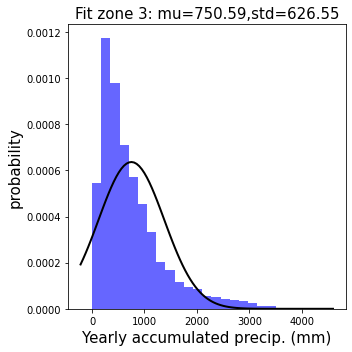

In [13]:
zone = 3
precip_yearly = np.array(df_22[df_22["zone"] == zone]["precip"], dtype=float)

mu = float(df_23[df_23["zone"] == zone]["mean"])
std = float(df_23[df_23["zone"] == zone]["std"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(precip_yearly, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit zone %d: mu=%.2f,std=%.2f" % (zone, mu, std)
plt.xlabel("Yearly accumulated precip. (mm)", fontsize=15)
plt.ylabel("probability", fontsize=15)
plt.title(title, fontsize=15)
fig.tight_layout()
# plt.savefig("fit_distribution.png", dpi=300)

In [14]:
df_24 = pd.read_csv("./mean-yearly-precip-lat-lon-natural-zone.txt", sep="\t", header=None, 
                   names=["code", "annual_mean", "lat", "lon", "zone"])
df_24.head()

,code,annual_mean,lat,lon,zone
0,3404002,47.797727,-27.8364,-69.7550,1
1,220002,6.277083,-22.4989,-68.9072,1
2,4723001,135.800000,-31.5608,-70.9644,2
3,10111002,2274.300000,-39.7731,-72.4581,4
4,3430003,107.050000,-28.0003,-69.9747,2


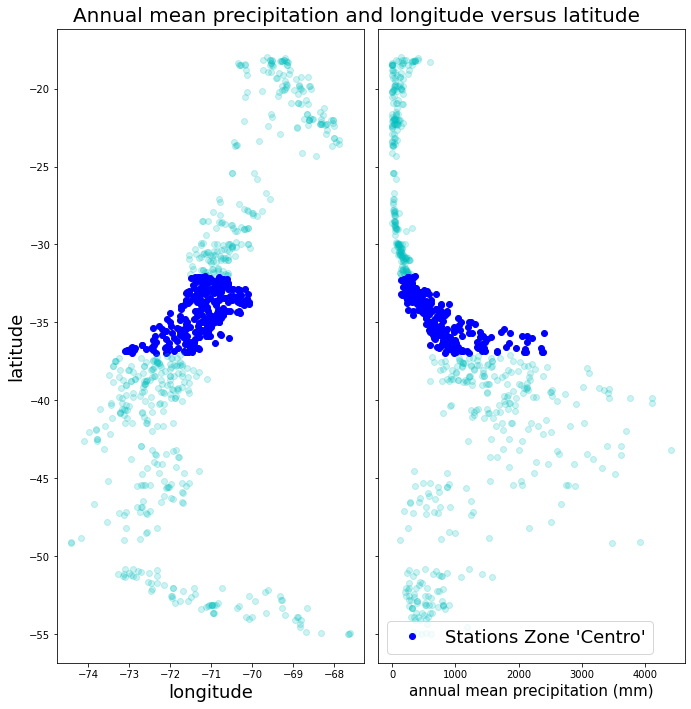

In [15]:
zones = np.unique(np.array(df_24["zone"], dtype=int))

fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

for zone in zones:
    annual_mean = np.array(df_24[df_24["zone"] == zone]["annual_mean"], dtype=float)
    lat = np.array(df_24[df_24["zone"] == zone]["lat"], dtype=float)
    lon = np.array(df_24[df_24["zone"] == zone]["lon"], dtype=float)
    if zone == 3:
        ax[1].plot(annual_mean, lat, "bo", label="Stations Zone 'Centro'")
        ax[0].plot(lon, lat, "bo", label="Zone {}".format(zone))
    else:
        ax[1].plot(annual_mean, lat, "co", alpha=0.2)
        ax[0].plot(lon, lat, "co", alpha=0.2)
    
    
ax[1].set_xlabel("annual mean precipitation (mm)", fontsize=15)
ax[0].set_ylabel("latitude", fontsize=18)

ax[0].set_xlabel("longitude", fontsize=18)

plt.legend(fontsize=18)
fig.suptitle("Annual mean precipitation and longitude versus latitude", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
# plt.savefig("annual_mean_lat_lon.png", dpi=300)
# ax[1].set_xlim([-76, -66])

# plots para division por natural iniciando desde 1960

In [16]:
df_31 = pd.read_csv("./yearly-spi-by-natural-zone2.txt", sep="\t", header=None, names=["zone", "year", "SPI"])
df_31 = df_31.sort_values(by=["zone", "year"])
df_31.head()

,zone,year,SPI
48,1,1961,-0.625044
49,1,1962,-0.425105
50,1,1963,2.302432
51,1,1964,0.405225
52,1,1965,0.019025


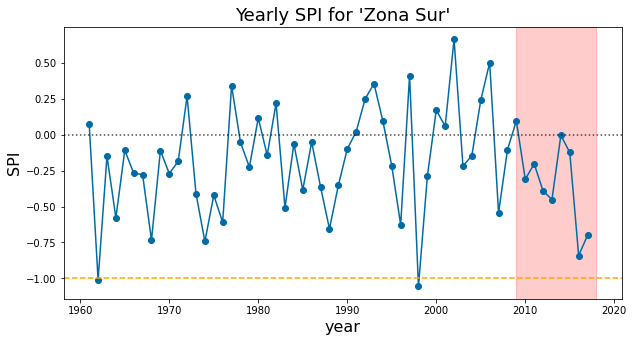

In [17]:
zone = 4
zone_name = "Zona Sur"
y = np.array(df_31[df_31["zone"] == zone]["SPI"], dtype=float)
x = np.array(df_31[df_31["zone"] == zone]["year"], dtype=int)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, '-o')
ax.axvspan(2009, 2018, color="red", alpha=0.2)
ax.axhline(-1.0, color="orange", linestyle="--")
ax.axhline(0, color="black", linestyle=":", alpha=0.7)
ax.set_xlabel("year", fontsize=16)
ax.set_ylabel("SPI", fontsize=16)
ax.set_title("Yearly SPI for '{}'".format(zone_name), fontsize=18)
ticks = np.arange(int(x[0] / 10)  * 10, 2020, 15)
plt.savefig("yearly_spi_natural2_sur.png", dpi=300)

In [18]:
# archivo  generado por compute_statistics_natural.py
df_32 = pd.read_csv("./yearly-data-with-natural-zone2.txt", sep="\t", header=None, names=["code", "year", "precip", "zone"])
df_32 = df_32.sort_values(by=["zone", "year"])
df_32.head()

,code,year,precip,zone
0,180005,1961,0.0,1
55,200006,1961,0.2,1
154,230001,1961,1.4,1
211,270008,1961,11.5,1
1582,1020016,1961,264.4,1


In [19]:
# archivo  generado por compute_statistics_natural.py
df_33 = pd.read_csv("./mean-std-natural-zone-yearly-data2.txt", sep="\t", header=None, names=["zone", "mean", "std"])
df_33.head()

,zone,mean,std
0,1,84.135462,124.287944
1,3,735.338330,606.783402
2,2,140.373302,128.356882
3,5,915.343178,869.246604
4,4,1798.167241,798.467396


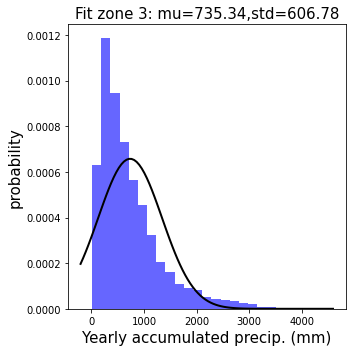

In [20]:
zone = 3
precip_yearly = np.array(df_32[df_32["zone"] == zone]["precip"], dtype=float)

mu = float(df_33[df_23["zone"] == zone]["mean"])
std = float(df_33[df_23["zone"] == zone]["std"])

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(precip_yearly, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit zone %d: mu=%.2f,std=%.2f" % (zone, mu, std)
plt.xlabel("Yearly accumulated precip. (mm)", fontsize=15)
plt.ylabel("probability", fontsize=15)
plt.title(title, fontsize=15)
fig.tight_layout()
# plt.savefig("fit_distribution.png", dpi=300)

In [21]:
df_34 = pd.read_csv("./mean-yearly-precip-lat-lon-natural-zone2.txt", sep="\t", header=None, 
                   names=["code", "annual_mean", "lat", "lon", "zone"])
df_34.head()

,code,annual_mean,lat,lon,zone
0,3404002,47.797727,-27.8364,-69.7550,1
1,220002,6.277083,-22.4989,-68.9072,1
2,4723001,135.800000,-31.5608,-70.9644,2
3,10111002,2274.300000,-39.7731,-72.4581,4
4,3430003,107.050000,-28.0003,-69.9747,2


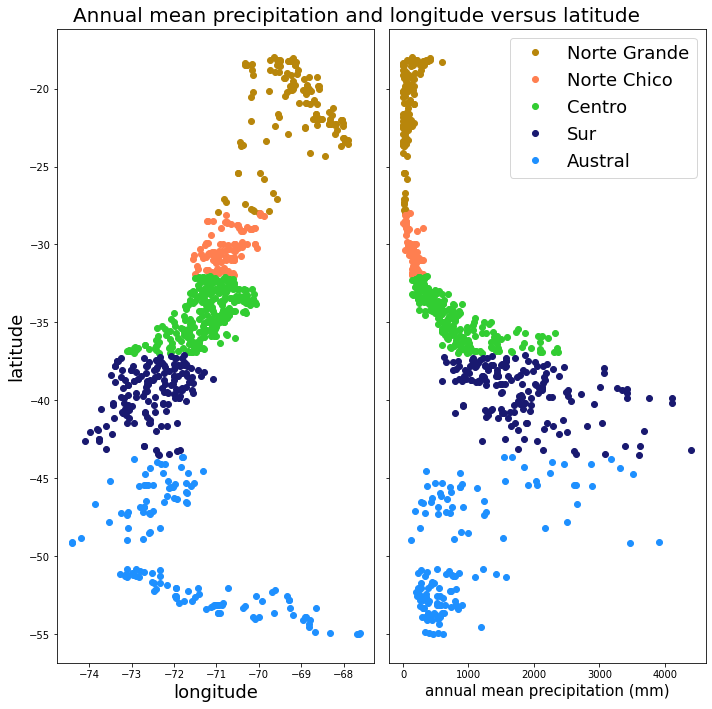

In [22]:
zones = np.unique(np.array(df_34["zone"], dtype=int))

fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

colors = [None, "darkgoldenrod", "coral", "limegreen", "midnightblue", "dodgerblue"]
labels = [None, "Norte Grande", "Norte Chico", "Centro", "Sur", "Austral"]

for zone in zones:
    annual_mean = np.array(df_34[df_34["zone"] == zone]["annual_mean"], dtype=float)
    lat = np.array(df_34[df_34["zone"] == zone]["lat"], dtype=float)
    lon = np.array(df_34[df_34["zone"] == zone]["lon"], dtype=float)
    ax[1].plot(annual_mean, lat, "o", color=colors[zone], label=labels[zone])
    ax[0].plot(lon, lat, "o", color=colors[zone])
    
    
ax[1].set_xlabel("annual mean precipitation (mm)", fontsize=15)
ax[0].set_ylabel("latitude", fontsize=18)

ax[0].set_xlabel("longitude", fontsize=18)

plt.legend(fontsize=18)
fig.suptitle("Annual mean precipitation and longitude versus latitude", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig("annual_mean_lat_lon_natural2.png", dpi=300)